In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [32]:
start = '2014-01-01'
end = '2024-12-31'
df = yf.download('META',start=start,end=end)
df.head()

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,META,META,META,META,META
Date,,,,,
2014-01-02,54.453362,54.960971,53.935800,54.572801,43195500
2014-01-03,54.304066,55.388953,54.274204,54.761907,38246200
2014-01-06,56.931683,56.991399,53.796457,54.164721,68852600
2014-01-07,57.648300,58.275346,56.951587,57.429335,77207400
2014-01-08,57.956848,58.136004,56.961539,57.329802,56682400


In [33]:
df.tail()


Price,Close,High,Low,Open,Volume
Ticker,META,META,META,META,META
Date,,,,,
2024-12-23,599.316772,600.555721,585.728886,589.075884,10205800
2024-12-24,607.209778,607.449555,598.747336,602.184220,4726100
2024-12-26,602.813660,605.761050,598.407607,604.941771,6081400
2024-12-27,599.276855,601.315020,589.275743,598.877187,8084200
2024-12-30,590.714417,596.409362,585.059475,588.226640,7025900


In [34]:
df=df.reset_index()
df.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,META,META,META,META,META
0,2014-01-02,54.453362,54.960971,53.935800,54.572801,43195500
1,2014-01-03,54.304066,55.388953,54.274204,54.761907,38246200
2,2014-01-06,56.931683,56.991399,53.796457,54.164721,68852600
3,2014-01-07,57.648300,58.275346,56.951587,57.429335,77207400
4,2014-01-08,57.956848,58.136004,56.961539,57.329802,56682400


In [35]:
df=df.drop(['Date'],axis=1,level=0)
df.head()

Price,Close,High,Low,Open,Volume
Ticker,META,META,META,META,META
0,54.453362,54.960971,53.935800,54.572801,43195500
1,54.304066,55.388953,54.274204,54.761907,38246200
2,56.931683,56.991399,53.796457,54.164721,68852600
3,57.648300,58.275346,56.951587,57.429335,77207400
4,57.956848,58.136004,56.961539,57.329802,56682400


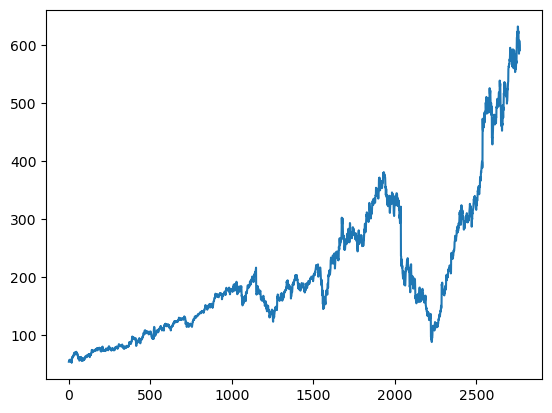

In [36]:
plt.plot(df.Close)

In [37]:
df

Price,Close,High,Low,Open,Volume
Ticker,META,META,META,META,META
0,54.453362,54.960971,53.935800,54.572801,43195500
1,54.304066,55.388953,54.274204,54.761907,38246200
2,56.931683,56.991399,53.796457,54.164721,68852600
3,57.648300,58.275346,56.951587,57.429335,77207400
4,57.956848,58.136004,56.961539,57.329802,56682400
...,...,...,...,...,...
2762,599.316772,600.555721,585.728886,589.075884,10205800
2763,607.209778,607.449555,598.747336,602.184220,4726100
2764,602.813660,605.761050,598.407607,604.941771,6081400


In [38]:
ma100=df.Close.rolling(100).mean()
ma100

Ticker,META
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
2762,560.746265
2763,561.949877
2764,563.233299
2765,564.298239


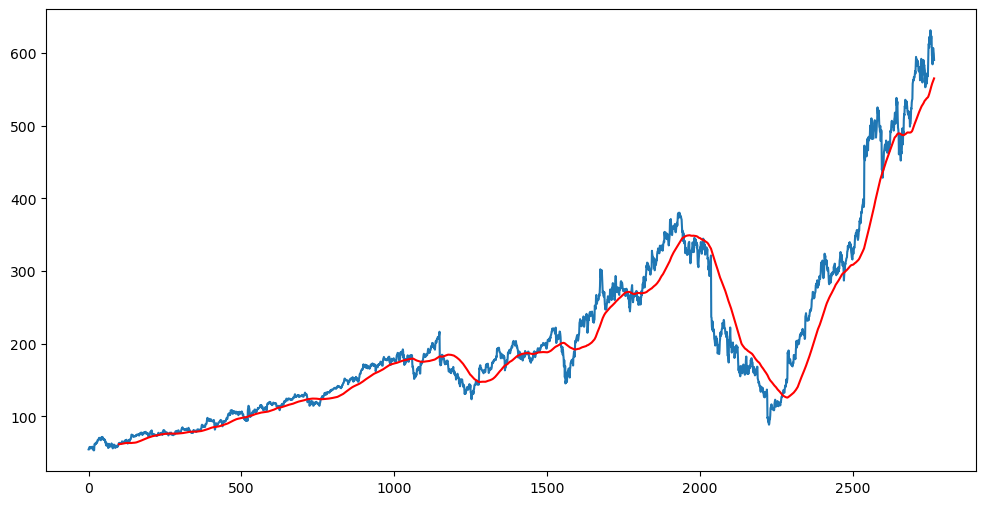

In [39]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')


In [40]:
ma200=df.Close.rolling(200).mean()
ma200

Ticker,META
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
2762,524.072213
2763,524.699101
2764,525.223502
2765,525.751043


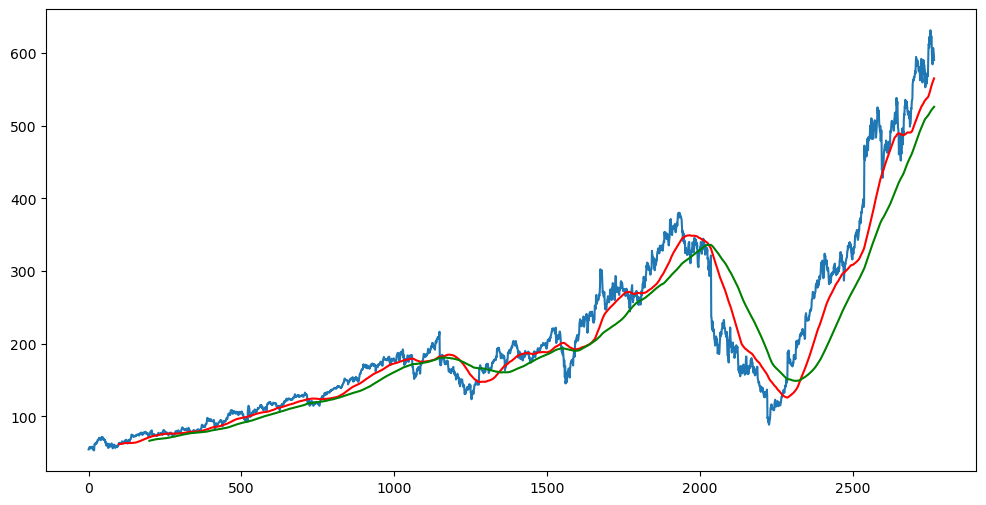

In [41]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')


In [42]:
df.shape


(2767, 5)

In [43]:
#split data
data_training=pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing=pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])
print(data_training.shape)
print(data_testing.shape)
 

(1936, 1)
(831, 1)


In [44]:
data_training.head()

Ticker,META
0,54.453362
1,54.304066
2,56.931683
3,57.648300
4,57.956848


In [45]:
data_testing.head()

Ticker,META
1936,376.913635
1937,374.743866
1938,374.763733
1939,372.165985
1940,371.310028


In [46]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [47]:
data_training_arr=scaler.fit_transform(data_training)
data_training_arr

array([[0.00359046],
       [0.00313405],
       [0.01116691],
       ...,
       [1.        ],
       [0.98597291],
       [0.98728137]])

In [48]:
data_training_arr.shape

(1936, 1)

In [49]:
x_train=[]
y_train=[]
for i in range(100,data_training_arr.shape[0]):
    x_train.append(data_training_arr[i-100:i])
    y_train.append(data_training_arr[i,0])
x_train,y_train=np.array(x_train),np.array(y_train)

In [51]:
x_train.shape

(1836, 100, 1)

In [54]:
#ML model
from keras.layers import Dense, Dropout , LSTM,Input
from keras.models import Sequential

In [55]:
model = Sequential() 
model.add(Input(shape=(x_train.shape[1], 1)))
model.add(LSTM(units=50,activation= 'relu', return_sequences=True))
model.add(Dropout(0.2))


model.add(LSTM(units=60,activation= 'relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80,activation= 'relu', return_sequences=True))
model.add(Dropout(0.4))


model.add(LSTM(units=120,activation= 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

In [56]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape          ┃      Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                 │ (None, 100, 50)       │       10,400 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dropout_4 (Dropout)           │ (None, 100, 50)       │            0 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ lstm_5 (LSTM)                 │ (None, 100, 60)       │       26,640 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dropout_5 (Dropout)           │ (None, 100, 60)       │            0 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ lstm_6 (LSTM)                 │ (None, 100, 80)       │       45,120 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dropout_6 (Dropout)           │ (None, 100, 80)       │            0 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ lstm_7 (LSTM)                 │ (None, 120)           │       96,480 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dropout_7 (Dropout)           │ (None, 120)           │            0 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dense_1 (Dense)               │ (None, 1)             │          121 │
└───────────────────────────────┴───────────────────────┴──────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [57]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs=50)


Epoch 1/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 24s 223ms/step - loss: 0.0588
Epoch 2/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 13s 221ms/step - loss: 0.0062
Epoch 3/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 13s 228ms/step - loss: 0.0056
Epoch 4/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 12s 213ms/step - loss: 0.0046
Epoch 5/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 12s 205ms/step - loss: 0.0072
Epoch 6/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 12s 208ms/step - loss: 0.0047
Epoch 7/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 12s 213ms/step - loss: 0.0039
Epoch 8/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 12s 208ms/step - loss: 0.0043
Epoch 9/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 12s 205ms/step - loss: 0.0037
Epoch 10/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 21s 207ms/step - loss: 0.0039
Epoch 11/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 12s 205ms/step - loss: 0.0042
Epoch 12/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 12s 205ms/step - loss: 0.0043
Epoch 13/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 12s 208ms/step - loss: 0.0034
Epoch 14/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 12s 206ms/step - loss: 0.0032
Epoch 15/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 12s 

In [59]:
model.save('keras_model.keras')

In [60]:
data_testing.head()

Ticker,META
1936,376.913635
1937,374.743866
1938,374.763733
1939,372.165985
1940,371.310028


In [63]:
past_data=data_training.tail(100)


In [65]:
final_df = pd.concat([past_data, data_testing], ignore_index=True)


In [66]:
final_df.head()

Ticker,META
0,301.230286
1,300.055847
2,295.129059
3,299.717438
4,301.618500


In [67]:
input_data=scaler.fit_transform(final_df)
input_data

array([[0.39169838],
       [0.38953597],
       [0.38046462],
       [0.38891288],
       [0.39241317],
       [0.39338441],
       [0.39985344],
       [0.44092184],
       [0.43280347],
       [0.42822202],
       [0.42048844],
       [0.41436757],
       [0.42353051],
       [0.42180789],
       [0.39778262],
       [0.39880887],
       [0.39151514],
       [0.39648149],
       [0.41605354],
       [0.41517395],
       [0.40509466],
       [0.41174698],
       [0.42094656],
       [0.41658504],
       [0.43197882],
       [0.43776981],
       [0.43753151],
       [0.44685948],
       [0.43949248],
       [0.44022547],
       [0.44026211],
       [0.43456283],
       [0.44246116],
       [0.45387821],
       [0.44856383],
       [0.44227798],
       [0.44632798],
       [0.44412887],
       [0.45422642],
       [0.45418984],
       [0.44379898],
       [0.45374998],
       [0.44119672],
       [0.44601646],
       [0.45836817],
       [0.46122695],
       [0.46597336],
       [0.462

In [68]:
input_data.shape

(931, 1)

In [69]:
x_test=[]
y_test=[]
for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])
    

               

In [70]:
x_test,y_test=np.array(x_test),np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(831, 100, 1)
(831,)


In [71]:
#predictions 
y_predict=model.predict(x_test)

26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 120ms/step


In [72]:
y_predict.shape

(831, 1)

In [73]:
y_test

array([0.53104883, 0.52705378, 0.52709036, 0.52230731, 0.5207313 ,
       0.50544743, 0.48891743, 0.49217953, 0.46602837, 0.47106804,
       0.48389619, 0.48503235, 0.46133691, 0.45943106, 0.4590279 ,
       0.4656619 , 0.43491098, 0.44724432, 0.4484905 , 0.44039039,
       0.44191145, 0.43348151, 0.43040275, 0.43181391, 0.43912584,
       0.43221707, 0.45160584, 0.46012742, 0.46157516, 0.46359102,
       0.43194207, 0.43941915, 0.41581541, 0.40923631, 0.41784948,
       0.43003628, 0.44178317, 0.43830125, 0.44478865, 0.4525405 ,
       0.46221662, 0.4576168 , 0.45166079, 0.43749493, 0.43767816,
       0.46177676, 0.4740002 , 0.46557026, 0.46155678, 0.45774503,
       0.46985844, 0.46199669, 0.45510613, 0.46208834, 0.44753746,
       0.45653549, 0.43166719, 0.40626751, 0.40588273, 0.39937695,
       0.41959047, 0.42864345, 0.44284606, 0.44148997, 0.44136163,
       0.45004808, 0.44867373, 0.46318786, 0.45079957, 0.44876532,
       0.43348151, 0.4495167 , 0.44264456, 0.4514226 , 0.47147

In [74]:
y_predict

array([[0.5150638 ],
       [0.51752615],
       [0.5193614 ],
       [0.52058774],
       [0.5212086 ],
       [0.5212498 ],
       [0.52044725],
       [0.5183383 ],
       [0.51483953],
       [0.5096251 ],
       [0.50276893],
       [0.49506378],
       [0.4874654 ],
       [0.4802413 ],
       [0.47344428],
       [0.46711874],
       [0.46149153],
       [0.45612937],
       [0.4509215 ],
       [0.445976  ],
       [0.44132388],
       [0.43704236],
       [0.4330212 ],
       [0.42913753],
       [0.42541784],
       [0.42215976],
       [0.4194774 ],
       [0.4178719 ],
       [0.417776  ],
       [0.4192653 ],
       [0.42212722],
       [0.42538846],
       [0.42820823],
       [0.4295566 ],
       [0.42857003],
       [0.4252029 ],
       [0.42042187],
       [0.4157267 ],
       [0.41216707],
       [0.41039592],
       [0.4106975 ],
       [0.41294914],
       [0.41670823],
       [0.42125642],
       [0.42562848],
       [0.4290404 ],
       [0.43152562],
       [0.433

In [76]:
scaler.scale_

array([0.00184123])

In [77]:
scale_factor=1/0.00184123
y_predict=y_predict*scale_factor
y_test=y_test*scale_factor

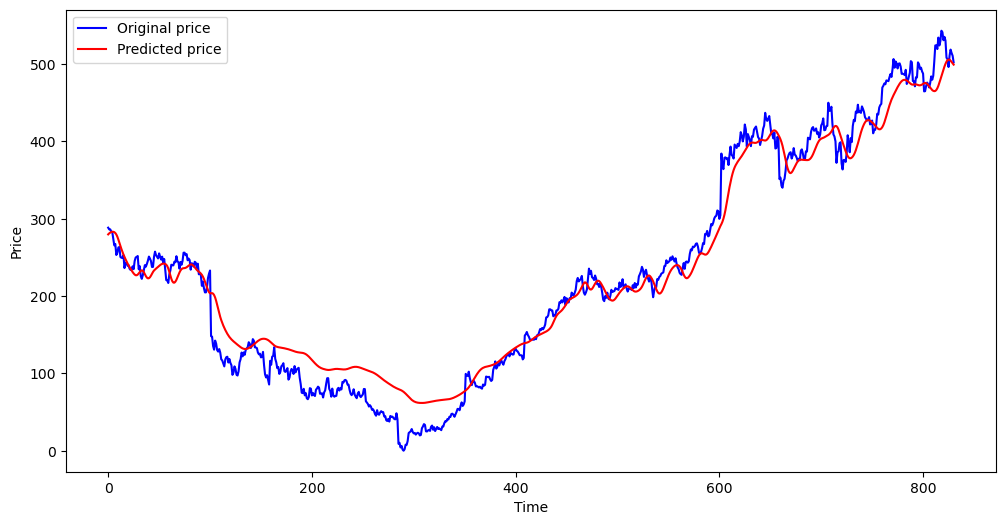

In [78]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label='Original price')
plt.plot(y_predict,'r',label='Predicted price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()